# Regression Assignment - Housing Price Prediction

## Business Objective
- Based on data collected on the past sale of houses in Australia, the actual value of the prospective housing properties are to be predicted.
- Based on the analysis, the US based Housing Company will decide whether to invest in them or not, to enter the market.

## Technical Objective
- To build Regression models based on Ridge and Lasso Regression
- To determine the optimal value of lambda for both the Regression Techniques
- To determine the variables that are significant in predicting the price of a house and
- To evaluate how the variables describe the price of a house

## Data Understanding and Preparation

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# reading the dataset
housing = pd.read_csv(r"D:\Maria\Data Science\Assignments\Advanced Regression\train.csv")

In [3]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
housing.shape

(1460, 81)

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
housing.select_dtypes('object').columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

### Analysing Categorical Variables

<Figure size 1440x1440 with 0 Axes>

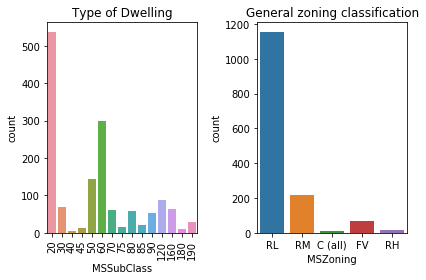

In [8]:
plt.figure(figsize=(20,20))
fig, axs = plt.subplots(1,2)
sns.countplot(x="MSSubClass", data=housing.fillna('Missing'),ax=axs[0])
axs[0].set_title('Type of Dwelling')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)
sns.countplot(x="MSZoning", data=housing.fillna('Missing'),ax=axs[1])
axs[1].set_title('General zoning classification')
fig.tight_layout()

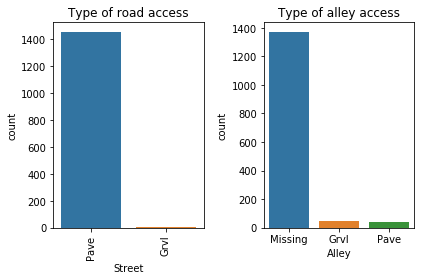

In [9]:
fig, axs = plt.subplots(1,2)
sns.countplot(x="Street", data=housing.fillna('Missing'),ax=axs[0])
axs[0].set_title('Type of road access')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)
sns.countplot(x="Alley", data=housing.fillna('Missing'),ax=axs[1])
axs[1].set_title('Type of alley access')
fig.tight_layout()

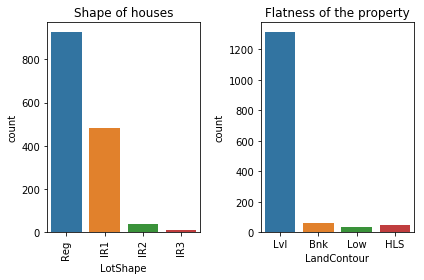

In [10]:
fig, axs = plt.subplots(1,2)
sns.countplot(x="LotShape", data=housing.fillna('Missing'),ax=axs[0])
axs[0].set_title('Shape of houses')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)
sns.countplot(x="LandContour", data=housing.fillna('Missing'),ax=axs[1])
axs[1].set_title('Flatness of the property')
fig.tight_layout()

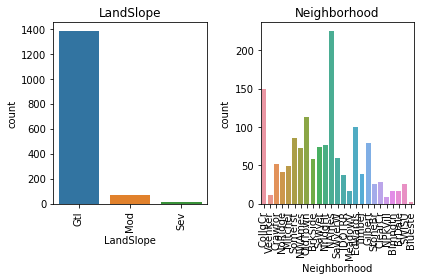

In [11]:
fig, axs = plt.subplots(1,2)
sns.countplot(x="LandSlope", data=housing.fillna('Missing'),ax=axs[0])
axs[0].set_title('LandSlope')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)
sns.countplot(x="Neighborhood", data=housing.fillna('Missing'),ax=axs[1])
axs[1].set_title('Neighborhood')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90)
fig.tight_layout()

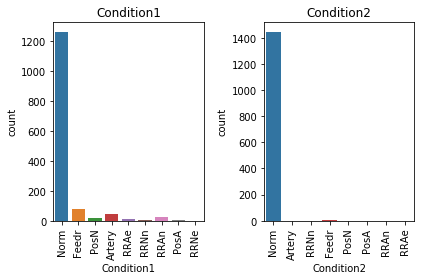

In [12]:
fig, axs = plt.subplots(1,2)
sns.countplot(x="Condition1", data=housing.fillna('Missing'),ax=axs[0])
axs[0].set_title('Condition1')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)
sns.countplot(x="Condition2", data=housing.fillna('Missing'),ax=axs[1])
axs[1].set_title('Condition2')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90)
fig.tight_layout()

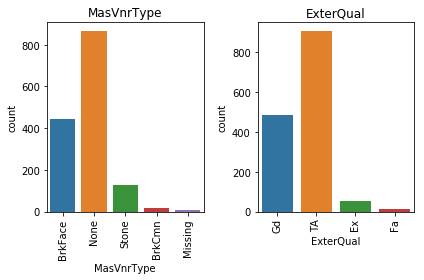

In [13]:
fig, axs = plt.subplots(1,2)
sns.countplot(x="MasVnrType", data=housing.fillna('Missing'),ax=axs[0])
axs[0].set_title('MasVnrType')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)
sns.countplot(x="ExterQual", data=housing.fillna('Missing'),ax=axs[1])
axs[1].set_title('ExterQual')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90)
fig.tight_layout()

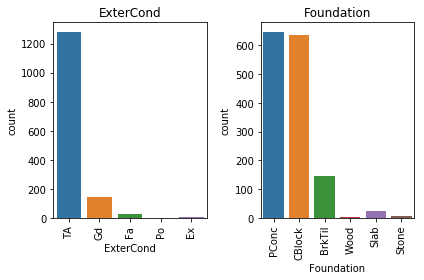

In [14]:
fig, axs = plt.subplots(1,2)
sns.countplot(x="ExterCond", data=housing.fillna('Missing'),ax=axs[0])
axs[0].set_title('ExterCond')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)
sns.countplot(x="Foundation", data=housing.fillna('Missing'),ax=axs[1])
axs[1].set_title('Foundation')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90)
fig.tight_layout()

### Inference:
- On analysing the categorical variables, the variables below are observed to be highly skewed and thus they may not contribute to the predictive power of the model.

In [15]:
# Removing some categorical columns which are largely skewed as they do not add much to the predictive power of the model
rem_cols = ['MSZoning', 'Street', 'Alley', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 
            'Condition2','BldgType', 'RoofStyle', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating', 
            'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 
            'MiscFeature']
housing.drop(columns=rem_cols,inplace=True)

### Univariate Analysis

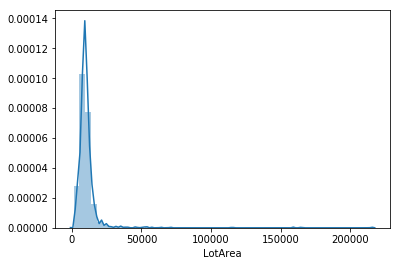

In [16]:
# LotArea: Lot size in square feet
sns.distplot(housing['LotArea'])
plt.show()

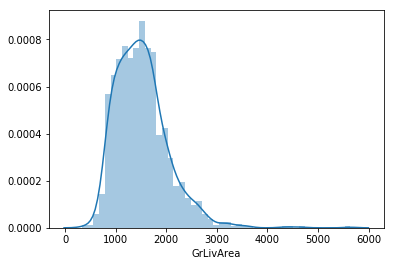

In [17]:
# Analysing the distribution of MasVnrArea
sns.distplot(housing['GrLivArea'])
plt.show()

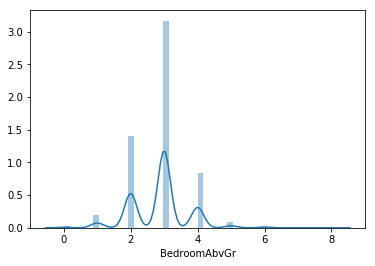

In [18]:
# Analysing the distribution of bedroons in the houses
sns.distplot(housing['BedroomAbvGr'])
plt.show()

## Inference:
The Univariate analysis shows the data quality is good without any extreme outliers

## Analysis of the target variable - SalePrice

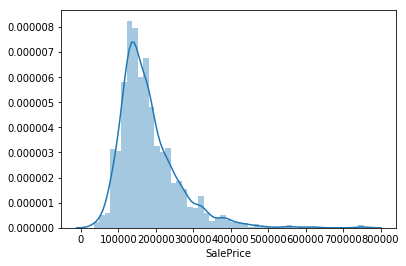

In [19]:
# Analysing the distribution of the target variable - Sale Price
# The distribution looks skewed towards right 
sns.distplot(housing['SalePrice'])
plt.show()

### Inference:
- The distribution of Sale Price looks skewed towards right
- Hence the data can be transformed in logrithmic scale to handle the skewness

## Data Transformations

### Converting Year Columns to Number of Years

In [20]:
# Converting YearBuilt column to age of the property in years "PropAgeYrs"
max_yr = housing.YearBuilt.max()
housing['PropAgeYrs'] = max_yr - housing['YearBuilt']

In [21]:
# Converting YearRemodAdd column to age of the property in years "PropAgeYrs"
max_yr = housing.YearRemodAdd.max()
housing['RemodAgeYrs'] = max_yr - housing['YearRemodAdd']

In [22]:
# converting GarageYrBlt column to age of the Garage in years 'GarageAgeYrs'
max_yr = housing.GarageYrBlt.max()
housing['GarageAgeYrs'] = max_yr - housing['GarageYrBlt']

In [23]:
# Converting the 'YrSold' to Number of year since sold - 'YearsSinceSold'
max_yr = housing['YrSold'].max()
housing['YearsSinceSold'] = max_yr - housing['YrSold']

### The values in LotShape are consolidated into two general categories (Reg - Regular) and (IR - Irregular) 
### IR is created by merging IR1,IR2,IR3

In [24]:
# Replacing all Irregular shapes with a single category as - IR - Irregular
housing.loc[housing['LotShape'].isin(['IR1','IR2','IR3']),'LotShape'] = 'IR'

## Converting the target variable to logarithmic scale

In [25]:
housing['SalePrice'] = np.log(housing['SalePrice'])

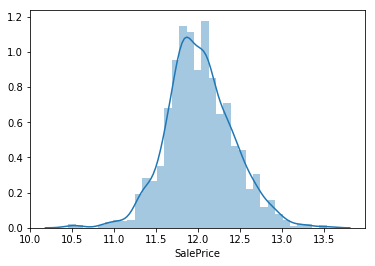

In [26]:
# Analysing the distribution of the target variable - Sale Price
# The distribution looks normal
sns.distplot(housing['SalePrice'])
plt.show()

## Bivariate Analysis

### Analysis of sales year wise

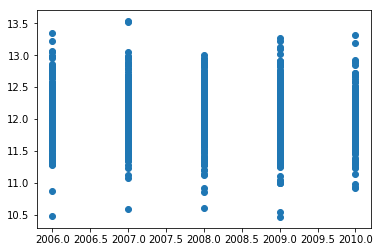

In [27]:
plt.scatter(x=housing['YrSold'],y=housing['SalePrice'])
ax =plt.gca()
plt.draw()

### The sales are pretty equal across the years 

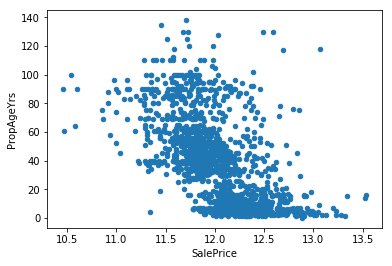

In [28]:
housing.plot.scatter(x='SalePrice', y='PropAgeYrs')

### The above plot shows the sales are more when the property is constructed pretty recently

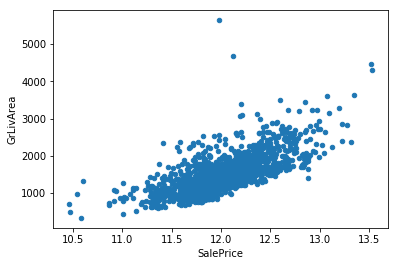

In [29]:
# BedroomAbvGr
housing.plot.scatter(x='SalePrice', y='GrLivArea')

### The plot above shows that sales are more towards a decent living area

### Analysis of SalePrice over different sale conditions

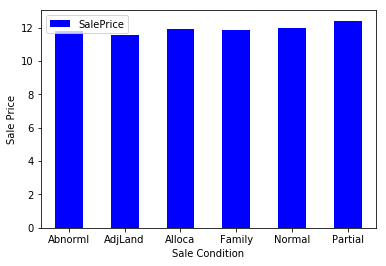

In [30]:
condition_pivot = housing.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Sale Price')
plt.xticks(rotation=0)
plt.show()

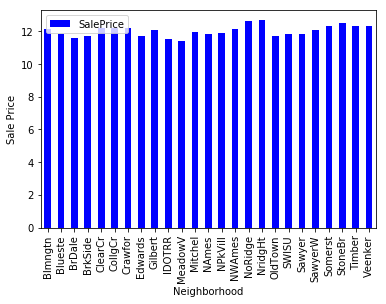

In [31]:
condition_pivot = housing.pivot_table(index='Neighborhood', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Neighborhood')
plt.ylabel('Sale Price')
plt.xticks(rotation=90)
plt.show()

The sale Price is observed to be evenly distributed across the various neighborhoods. 

### Analysis of relation between the numeric variables

<Figure size 1440x720 with 0 Axes>

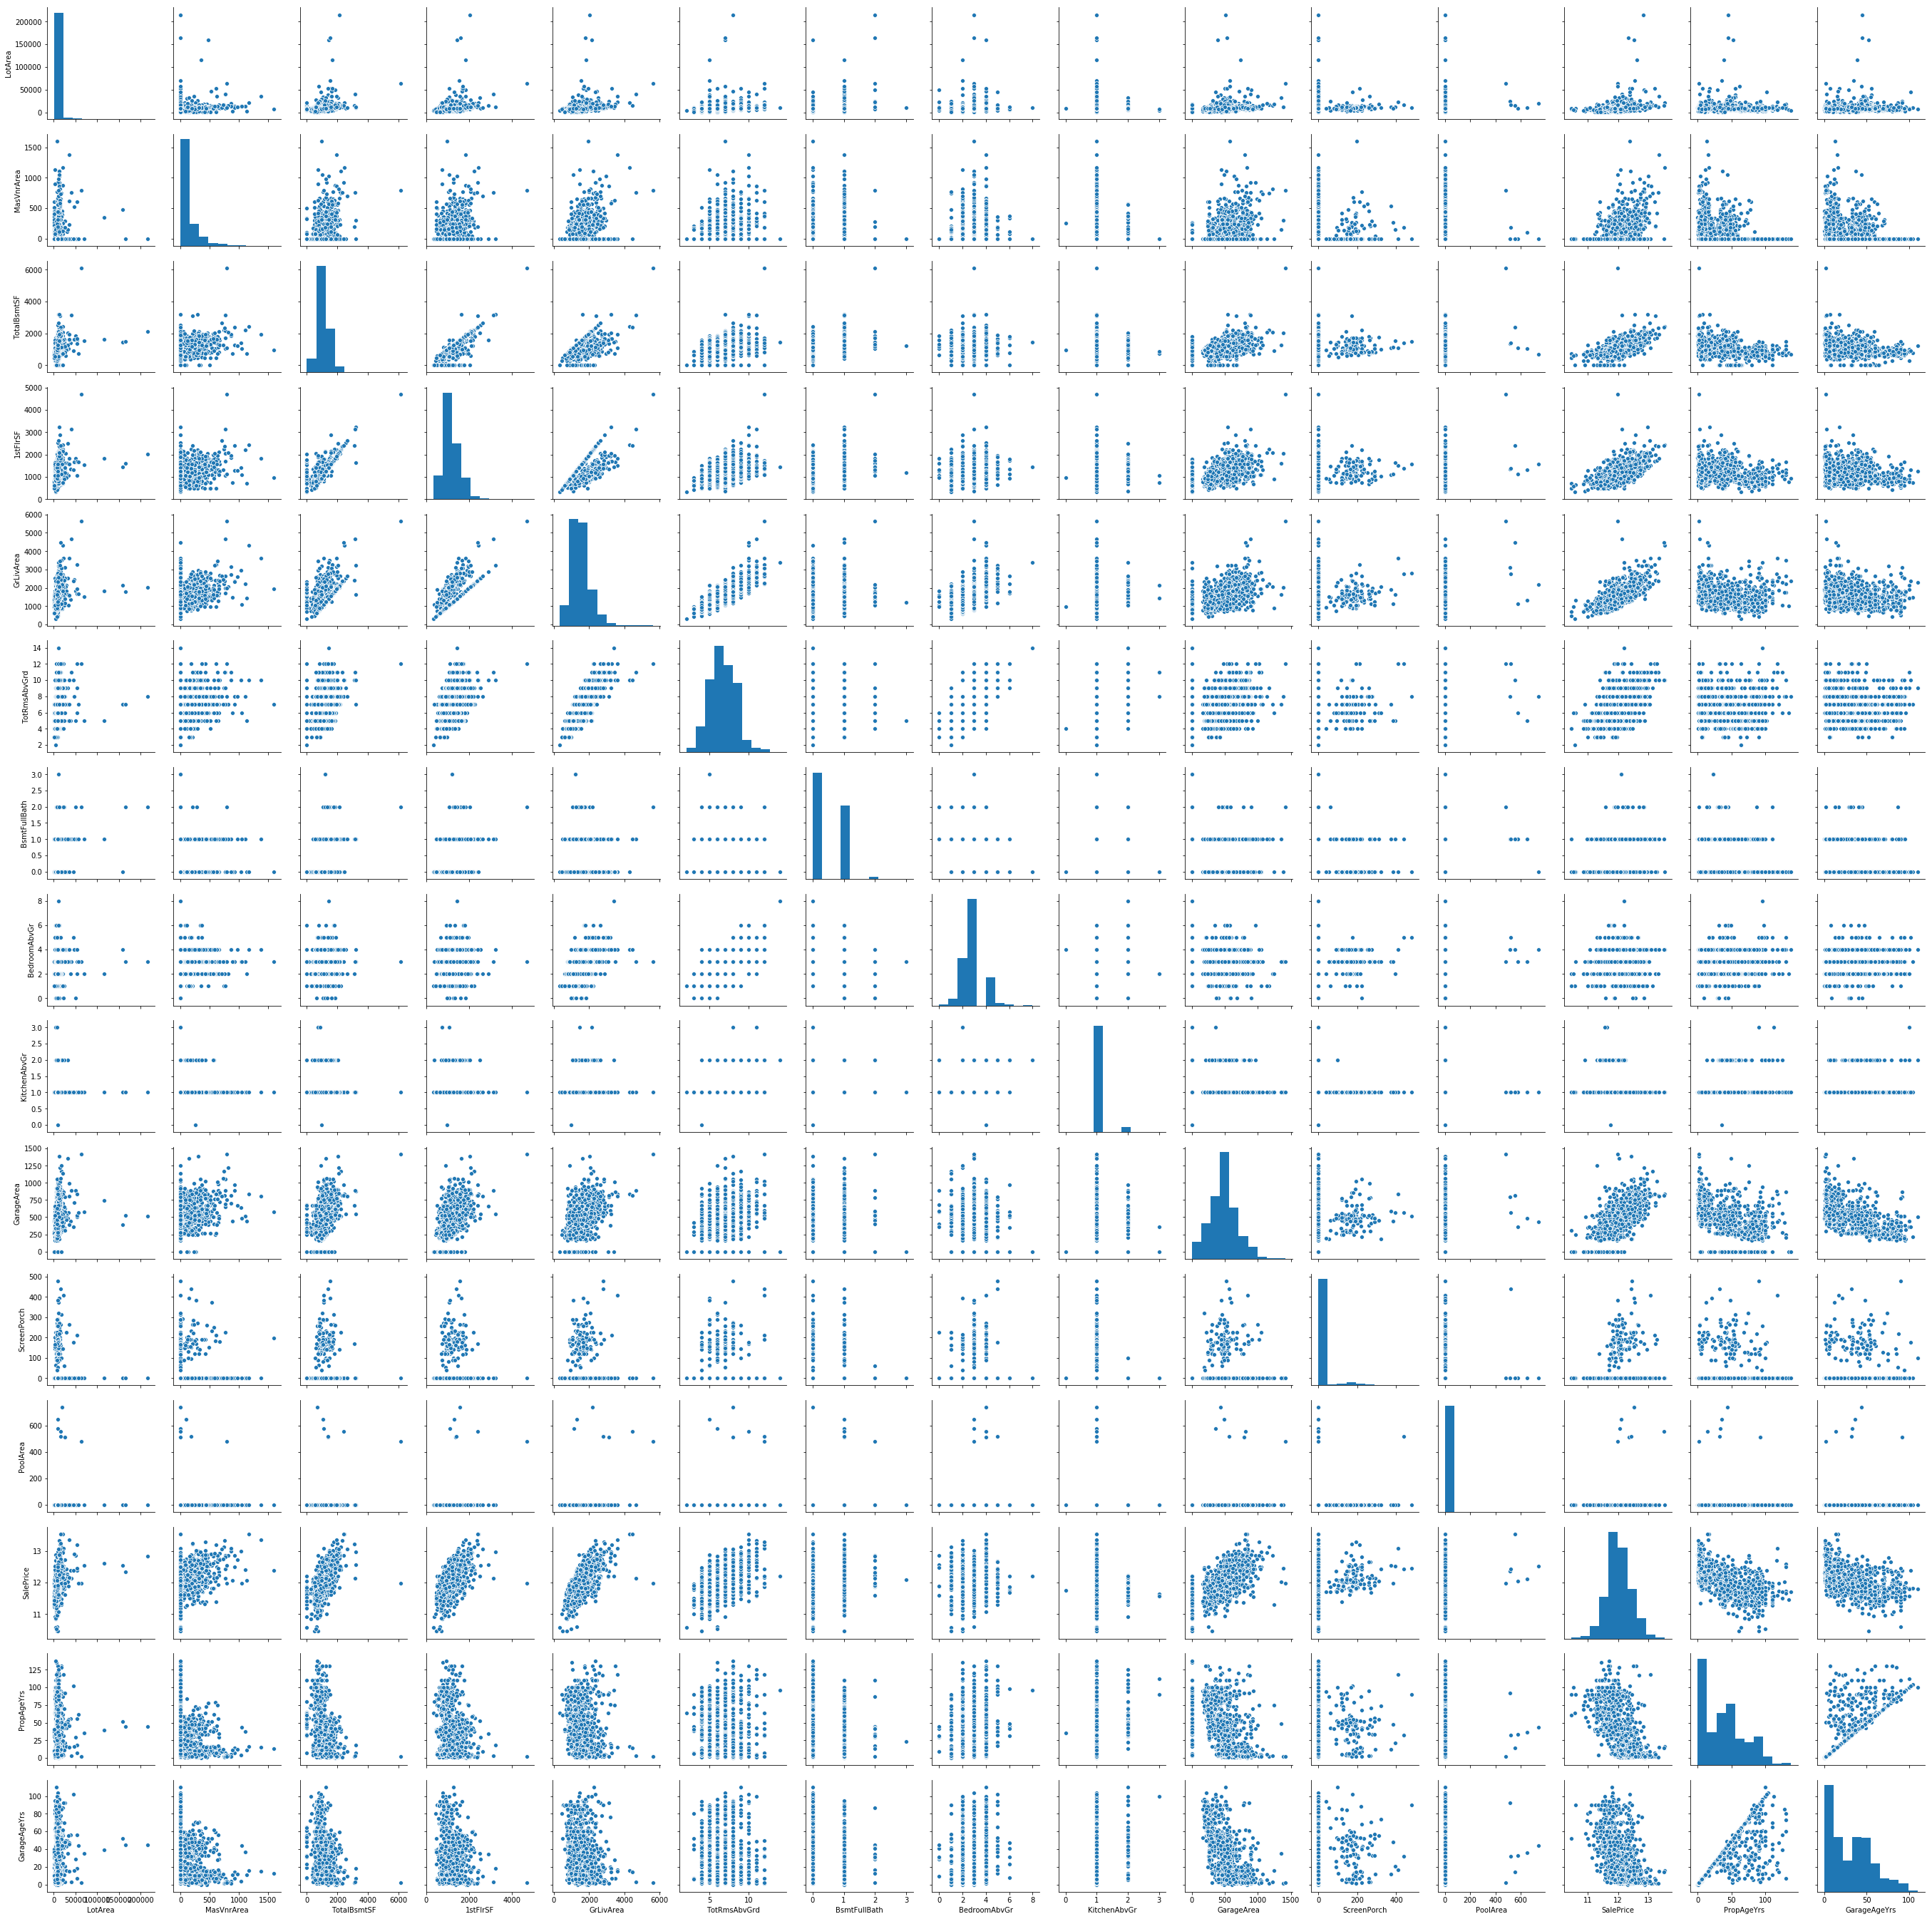

In [32]:
# Pairplot of numeric variables to analyse collinearity
num_cols = ['LotArea','MasVnrArea','TotalBsmtSF','1stFlrSF','GrLivArea','TotRmsAbvGrd','BsmtFullBath',
            'BedroomAbvGr','KitchenAbvGr','GarageArea','ScreenPorch','PoolArea','SalePrice',
            'PropAgeYrs','GarageAgeYrs']
housing_pp = housing[num_cols]
plt.figure(figsize=(20, 10))
sns.pairplot(housing_pp)
plt.show()

In [33]:
corr = housing_pp.corr()
corr.style.background_gradient(cmap='viridis', low=.5, high=0).highlight_null('red')

,LotArea,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,TotRmsAbvGrd,BsmtFullBath,BedroomAbvGr,KitchenAbvGr,GarageArea,ScreenPorch,PoolArea,SalePrice,PropAgeYrs,GarageAgeYrs
LotArea,1,0.10416,0.260833,0.299475,0.263116,0.190015,0.158155,0.11969,-0.0177839,0.180403,0.0431604,0.0776724,0.25732,-0.0142277,0.0249474
MasVnrArea,0.10416,1,0.363936,0.344501,0.390857,0.280682,0.0853098,0.102821,-0.0376103,0.373066,0.0614655,0.0117231,0.430809,-0.315707,-0.252691
TotalBsmtSF,0.260833,0.363936,1,0.81953,0.454868,0.285573,0.307351,0.05045,-0.0689006,0.486665,0.084489,0.126053,0.612134,-0.391452,-0.322445
1stFlrSF,0.299475,0.344501,0.81953,1,0.566024,0.409516,0.244671,0.127401,0.0681006,0.489782,0.0887581,0.131525,0.596981,-0.281986,-0.233449
GrLivArea,0.263116,0.390857,0.454868,0.566024,1,0.825489,0.034836,0.52127,0.100063,0.468997,0.10151,0.170205,0.700927,-0.19901,-0.231197
TotRmsAbvGrd,0.190015,0.280682,0.285573,0.409516,0.825489,1,-0.0532752,0.67662,0.256045,0.337822,0.0593826,0.0837573,0.534422,-0.0955891,-0.148112
BsmtFullBath,0.158155,0.0853098,0.307351,0.244671,0.034836,-0.0532752,1,-0.150673,-0.0415025,0.179189,0.0231477,0.0676156,0.236224,-0.187599,-0.124553
BedroomAbvGr,0.11969,0.102821,0.05045,0.127401,0.52127,0.67662,-0.150673,1,0.198597,0.0652525,0.0442997,0.0707026,0.209044,0.0706512,0.0645184
KitchenAbvGr,-0.0177839,-0.0376103,-0.0689006,0.0681006,0.100063,0.256045,-0.0415025,0.198597,1,-0.064433,-0.0516134,-0.0145251,-0.147548,0.1748,0.124411
GarageArea,0.180403,0.373066,0.486665,0.489782,0.468997,0.337822,0.179189,0.0652525,-0.064433,1,0.0514118,0.0610473,0.650888,-0.478954,-0.564567


### Inference:
Variables showing positive Correlation:<br>
- It is observed that if the Ist Floor Area is more, the Basement area is relatively more
- If the ground living area is more number of rooms above ground is relatively more
- If the Garage Area is more, it can accomodate more cars and hence Garagecars is also relatively more
<br>

Variables showing negative Correlation: <br>
- If Age of the Property is more, the Sale Price decreases
- If Finished area of basement is more, it implies the basement unfinished area is less
- If basement Bath is available, it implies the basement unfinished area is less as well

### Addressing Multicollinearity and Data Redundancy

In [34]:
# Removing some categorical columns which are largely correlated
rem_cols = ['TotalBsmtSF', 'GrLivArea', 'GarageCars']
housing.drop(columns=rem_cols,inplace=True)

In [35]:
# Dropping MSSubClass which is redundant to column 'housestyle'
housing.drop(columns='MSSubClass',inplace=True)

In [36]:
# Dropping the Year columns as they are translated to Age or Number of Years appropriately
housing.drop(columns=['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold'],inplace=True)

In [37]:
# Dropping Id columns since it is not adding to the prediction in modelling
housing.drop(columns='Id',inplace=True)

### Outliers Analysis

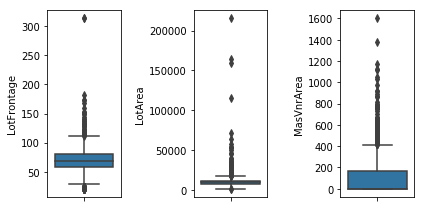

In [38]:
plt.figure(figsize=(6,3))
plt.subplot(1,3,1)
sns.boxplot(y = 'LotFrontage', data = housing)
plt.subplot(1,3,2)
sns.boxplot(y = 'LotArea', data = housing)
plt.subplot(1,3,3)
sns.boxplot(y = 'MasVnrArea', data = housing)
plt.tight_layout()
plt.show()

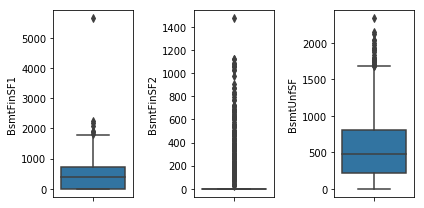

In [39]:
plt.figure(figsize=(6,3))
plt.subplot(1,3,1)
sns.boxplot(y = 'BsmtFinSF1', data = housing)
plt.subplot(1,3,2)
sns.boxplot(y = 'BsmtFinSF2', data = housing)
plt.subplot(1,3,3)
sns.boxplot(y = 'BsmtUnfSF', data = housing)
plt.tight_layout()
plt.show()

### Removing outliers using IQR

In [40]:
housing.shape

(1460, 51)

In [41]:
# Remove outliers in SalesPrice using IQR
Q1 = housing['SalePrice'].quantile(0.05)
Q3 = housing['SalePrice'].quantile(0.95)
IQR = Q3 - Q1
housing = housing[(housing['SalePrice'] >= Q1 - 1.5*IQR) & (housing['SalePrice'] <= Q3 + 1.5*IQR)]


In [42]:
# Remove outliers in 1stFlrSF using IQR
Q1 = housing['1stFlrSF'].quantile(0.05)
Q3 = housing['1stFlrSF'].quantile(0.95)
IQR = Q3 - Q1
housing = housing[(housing['1stFlrSF'] >= Q1 - 1.5*IQR) & (housing['1stFlrSF'] <= Q3 + 1.5*IQR)]


In [43]:
housing.shape

(1459, 51)

### Missing Values Imputation

In [44]:
# Finding Percentage of missing values
round((housing.isnull().sum(axis = 0)/len(housing.index)) * 100, 2)

LotFrontage       17.75
LotArea            0.00
LotShape           0.00
Neighborhood       0.00
HouseStyle         0.00
OverallQual        0.00
OverallCond        0.00
Exterior1st        0.00
Exterior2nd        0.00
MasVnrType         0.55
MasVnrArea         0.55
ExterQual          0.00
Foundation         0.00
BsmtQual           2.54
BsmtExposure       2.60
BsmtFinType1       2.54
BsmtFinSF1         0.00
BsmtFinSF2         0.00
BsmtUnfSF          0.00
HeatingQC          0.00
1stFlrSF           0.00
2ndFlrSF           0.00
LowQualFinSF       0.00
BsmtFullBath       0.00
BsmtHalfBath       0.00
FullBath           0.00
HalfBath           0.00
BedroomAbvGr       0.00
KitchenAbvGr       0.00
KitchenQual        0.00
TotRmsAbvGrd       0.00
Fireplaces         0.00
FireplaceQu       47.29
GarageType         5.55
GarageFinish       5.55
GarageArea         0.00
WoodDeckSF         0.00
OpenPorchSF        0.00
EnclosedPorch      0.00
3SsnPorch          0.00
ScreenPorch        0.00
PoolArea        

### Replacing NA with meaningful values - if they are valid

In [45]:
# Filling all valid 'NA' values with meaningful values

# Replacing missing values with NB - No Basement - According to Data Dictionary
housing['BsmtQual'].fillna('NB',inplace=True)
# Replacing NA values with 'NB' No Basement - According to Data Dictionary
housing['BsmtExposure'].fillna('NB', inplace=True)
# Filling NA values of "FireplaceQu" with a more meaningful code - 'NF'
housing.FireplaceQu.fillna('NF', inplace=True)
# Filling NA - No Garage with values "NG"
housing.GarageType.fillna('NG',inplace=True)
# Filling NA - No Garage with values "NG"
housing.GarageFinish.fillna('NG',inplace=True)


### Replacing LotFrontage Null values with median of the same

In [46]:
# LotFrontage has outliers and hence we replace the Null values with median
housing.loc[np.isnan(housing['LotFrontage']),'LotFrontage'] = housing['LotFrontage'].median()

### Removing rows having null values in columns Veneer Type and Basement Finished Type1

In [47]:
# Removing rows having null values in column 'MasVnrType'
housing = housing[~pd.isnull(housing['MasVnrType'])]

In [48]:
# Removing rows having null values in column 'BsmtFinType1'
housing = housing[~pd.isnull(housing['BsmtFinType1'])]

In [49]:
# If there is no garage, GarageAgeYrs will be replaced with 0
housing.GarageAgeYrs.fillna(0,inplace=True)

### It is observed that there are no missing values after imputation

In [50]:
# Finding Percentage of missing values
round((housing.isnull().sum(axis = 0)/len(housing.index)) * 100, 2)

LotFrontage       0.0
LotArea           0.0
LotShape          0.0
Neighborhood      0.0
HouseStyle        0.0
OverallQual       0.0
OverallCond       0.0
Exterior1st       0.0
Exterior2nd       0.0
MasVnrType        0.0
MasVnrArea        0.0
ExterQual         0.0
Foundation        0.0
BsmtQual          0.0
BsmtExposure      0.0
BsmtFinType1      0.0
BsmtFinSF1        0.0
BsmtFinSF2        0.0
BsmtUnfSF         0.0
HeatingQC         0.0
1stFlrSF          0.0
2ndFlrSF          0.0
LowQualFinSF      0.0
BsmtFullBath      0.0
BsmtHalfBath      0.0
FullBath          0.0
HalfBath          0.0
BedroomAbvGr      0.0
KitchenAbvGr      0.0
KitchenQual       0.0
TotRmsAbvGrd      0.0
Fireplaces        0.0
FireplaceQu       0.0
GarageType        0.0
GarageFinish      0.0
GarageArea        0.0
WoodDeckSF        0.0
OpenPorchSF       0.0
EnclosedPorch     0.0
3SsnPorch         0.0
ScreenPorch       0.0
PoolArea          0.0
MiscVal           0.0
MoSold            0.0
SaleType          0.0
SaleCondit

In [51]:
housing.shape

(1414, 51)

### Duplicate Values check

In [52]:
housing.duplicated().value_counts()

False    1414
dtype: int64

No duplicate values found

## Data Encoding for Model Building

In [53]:
# creating dummy variables for categorical variables
# subset all categorical variables
housing_categorical = housing.select_dtypes(include=['object'])
housing_categorical.head()

,LotShape,Neighborhood,HouseStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish,SaleType,SaleCondition
0,Reg,CollgCr,2Story,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,No,GLQ,Ex,Gd,NF,Attchd,RFn,WD,Normal
1,Reg,Veenker,1Story,MetalSd,MetalSd,None,TA,CBlock,Gd,Gd,ALQ,Ex,TA,TA,Attchd,RFn,WD,Normal
2,IR,CollgCr,2Story,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,Mn,GLQ,Ex,Gd,TA,Attchd,RFn,WD,Normal
3,IR,Crawfor,2Story,Wd Sdng,Wd Shng,None,TA,BrkTil,TA,No,ALQ,Gd,Gd,Gd,Detchd,Unf,WD,Abnorml
4,IR,NoRidge,2Story,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,Av,GLQ,Ex,Gd,TA,Attchd,RFn,WD,Normal


### Encoding Binary Variables

In [54]:
# List of binary variables to map
varList = ['LotShape']

# Defining the map function
def binary_map(x):
    return x.map({'Reg':1, 'IR':0})

housing[varList] = housing[varList].apply(binary_map)

### Encoding Ordinal Categories 


In [55]:
# Columns
# 'BsmtExposure','BsmtFinType1','BsmtQual', 'ExterQual', 'FireplaceQu', 'HeatingQC', 'KitchenQual','GarageFinish'

In [56]:
housing['BsmtExposure']=housing['BsmtExposure'].map({'NB':1,'No':1, 'Mn':2, 'Av':3, 'Gd':4})

In [57]:
housing['BsmtFinType1']=housing['BsmtFinType1'].map({'NB':1, 'Unf':2, 'LwQ':3, 'Rec':4, 'BLQ':5, 'ALQ':6, 'GLQ':7})

In [58]:
housing['BsmtQual']=housing['BsmtQual'].map({'NB':1, 'Po':2, 'Fa':3, 'TA':4, 'Gd':5, 'Ex':6})

In [59]:
housing['ExterQual']=housing['ExterQual'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

In [60]:
housing['FireplaceQu']=housing['FireplaceQu'].map({'NF':1, 'Po':2, 'Fa':3, 'TA':4, 'Gd':5, 'Ex':6})

In [61]:
housing['HeatingQC']=housing['HeatingQC'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

In [62]:
housing['KitchenQual']=housing['KitchenQual'].map({'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})

In [63]:
housing['GarageFinish']=housing['GarageFinish'].map({'NG':1, 'Unf':2, 'RFn':3, 'Fin':4})

In [64]:
housing['OverallQual'] = housing['OverallQual'].map({1:'Very_Poor',2:'Poor',3:'Fair',4:'Below_Avg', 
                                                      5:'Average', 6:'Above_Avg',7:'Good',8:'Very_Good',
                                                     9:'Excellent',10:'Very_Excellent'})

In [65]:
housing['OverallCond'] = housing['OverallCond'].map({1:'Very_Poor',2:'Poor',3:'Fair',4:'Below_Avg', 
                                                      5:'Average', 6:'Above_Avg',7:'Good',8:'Very_Good',
                                                     9:'Excellent',10:'Very_Excellent'})

### One Hot Encoding by creating dummies

In [66]:
# creating dummy variables for categorical variables

# subset all categorical variables
housing_categorical = housing.select_dtypes(include=['object'])
housing_categorical.head()

,Neighborhood,HouseStyle,OverallQual,OverallCond,Exterior1st,Exterior2nd,MasVnrType,Foundation,GarageType,SaleType,SaleCondition
0,CollgCr,2Story,Good,Average,VinylSd,VinylSd,BrkFace,PConc,Attchd,WD,Normal
1,Veenker,1Story,Above_Avg,Very_Good,MetalSd,MetalSd,None,CBlock,Attchd,WD,Normal
2,CollgCr,2Story,Good,Average,VinylSd,VinylSd,BrkFace,PConc,Attchd,WD,Normal
3,Crawfor,2Story,Good,Average,Wd Sdng,Wd Shng,None,BrkTil,Detchd,WD,Abnorml
4,NoRidge,2Story,Very_Good,Average,VinylSd,VinylSd,BrkFace,PConc,Attchd,WD,Normal


In [67]:
pd.options.display.max_columns = 999

In [68]:
# convert into dummies
housing_dummies = pd.get_dummies(housing_categorical)
housing_dummies.head()

,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Above_Avg,OverallQual_Average,OverallQual_Below_Avg,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very_Excellent,OverallQual_Very_Good,OverallQual_Very_Poor,OverallCond_Above_Avg,OverallCond_Average,OverallCond_Below_Avg,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very_Good,OverallCond_Very_Poor,Exterior1st_AsbShng,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NG,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


### Dropping dummy variables with minimal values

In [69]:
# Drop First Columns - Columns with minimal values
drop_list = ['Neighborhood_Blueste','HouseStyle_2.5Fin','Exterior1st_ImStucc','Exterior2nd_Other','MasVnrType_BrkCmn',
             'Foundation_Wood', 'GarageType_2Types','SaleType_Con','SaleCondition_AdjLand',
             'OverallQual_Very_Poor','OverallCond_Very_Poor']
housing_dummies.drop(columns=drop_list, inplace=True)

In [70]:
# drop categorical variables 
housing = housing.drop(list(housing_categorical.columns), axis=1)

In [71]:
# concat dummy variables with X
housing = pd.concat([housing, housing_dummies], axis=1)

### Splitting dataset to Predictor and Response datasets

In [72]:
# Splitting X and y
X = housing[housing.columns.difference(['SalePrice'])]
y = housing['SalePrice']

In [73]:
X.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtExposure',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1', 'BsmtFullBath',
       'BsmtHalfBath',
       ...
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New',
       'SaleType_Oth', 'SaleType_WD', 'ScreenPorch', 'TotRmsAbvGrd',
       'WoodDeckSF', 'YearsSinceSold'],
      dtype='object', length=141)

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### Scaling using Standardization

In [75]:
# scale
scaler = StandardScaler()
scaler.fit(X)

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 1)

### Linear Regression - To analyze the most predictive variables

In [76]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Linear Regression Model
lr = LinearRegression()

rfe = RFE(lr, n_features_to_select=15)
rfe.fit(X_train,y_train)
 
print ("Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), X_train)))


Features sorted by their rank:
[(1, 'OverallCond_Above_Avg'), (1, 'OverallCond_Average'), (1, 'OverallCond_Below_Avg'), (1, 'OverallCond_Excellent'), (1, 'OverallCond_Fair'), (1, 'OverallCond_Good'), (1, 'OverallCond_Poor'), (1, 'OverallCond_Very_Good'), (1, 'OverallQual_Above_Avg'), (1, 'OverallQual_Average'), (1, 'OverallQual_Below_Avg'), (1, 'OverallQual_Fair'), (1, 'OverallQual_Good'), (1, 'OverallQual_Poor'), (1, 'OverallQual_Very_Good'), (2, 'OverallQual_Excellent'), (3, 'OverallQual_Very_Excellent'), (4, 'Exterior2nd_CBlock'), (5, 'Exterior1st_CBlock'), (6, 'Exterior1st_BrkComm'), (7, 'Exterior2nd_Stone'), (8, 'Neighborhood_ClearCr'), (9, 'Neighborhood_NoRidge'), (10, 'GarageType_NG'), (11, 'Neighborhood_Veenker'), (12, 'FullBath'), (13, 'Neighborhood_Crawfor'), (14, 'Neighborhood_StoneBr'), (15, 'Neighborhood_NridgHt'), (16, 'Neighborhood_Timber'), (17, 'Neighborhood_SawyerW'), (18, 'Neighborhood_Gilbert'), (19, 'Neighborhood_CollgCr'), (20, 'Neighborhood_Somerst'), (21, 'Neigh

### Estimating R squared value using Linear Regression

In [77]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [78]:
# linear regression
lm = LinearRegression()
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print("TRAIN SCORE - LINEAR REGRESSION")
r2_score(y_true=y_train, y_pred=y_train_pred)

TRAIN SCORE - LINEAR REGRESSION


0.9161937212325562

In [79]:
y_test_pred = lm.predict(X_test)
print("TEST SCORE - LINEAR REGRESSION")
r2_score(y_true=y_test, y_pred=y_test_pred)

TEST SCORE - LINEAR REGRESSION


0.9229168345211606

In [80]:
# model coefficients
model_parameters = list(lm.coef_)
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 0.00018062023019500625),
 ('1stFlrSF', 0.00016193288404816518),
 ('2ndFlrSF', 0.0002135264593397002),
 ('3SsnPorch', 0.008844139623044808),
 ('BedroomAbvGr', 0.012971371349041525),
 ('BsmtExposure', 0.0001198631944215714),
 ('BsmtFinSF1', 9.876719830130093e-05),
 ('BsmtFinSF2', 0.0066036786773461835),
 ('BsmtFinType1', 0.028778347622992754),
 ('BsmtFullBath', 0.007015365363848854),
 ('BsmtHalfBath', 0.017305220642047814),
 ('BsmtQual', 8.928115247881785e-05),
 ('BsmtUnfSF', 6.37881519100136e-05),
 ('EnclosedPorch', -0.020521987155616546),
 ('ExterQual', 0.029362282091081875),
 ('Exterior1st_AsbShng', -0.4153162302254627),
 ('Exterior1st_BrkComm', 0.12767409175032357),
 ('Exterior1st_BrkFace', -0.013383802422486699),
 ('Exterior1st_CBlock', 0.10599659228442718),
 ('Exterior1st_CemntBd', 0.03655280975663057),
 ('Exterior1st_HdBoard', 0.04121324698645854),
 ('Exterior1st_MetalSd', 0.0406888699034408),
 ('Exterior1st_Plywood', 0.011816820284945144),
 ('Exterior1st_Stone', -0.

## Ridge Regression

### Alpha - The Regularisation Coefficient is tuned for a range of values using Cross Validation

In [81]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   10.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

### Results of Cross-validation for specified values of alpha

In [82]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.050203,0.037034,0.003400,0.000490,0.0001,{'alpha': 0.0001},0.894405,0.855638,0.887529,0.809397,0.879369,0.865293,0.030846,24,0.914270,0.920616,0.915611,0.931649,0.918326,0.920094,0.006179
1,0.067804,0.062717,0.005600,0.004716,0.001,{'alpha': 0.001},0.894427,0.855786,0.887537,0.809406,0.879412,0.865339,0.030842,23,0.914270,0.920616,0.915611,0.931649,0.918326,0.920094,0.006179
2,0.025601,0.005536,0.006000,0.004517,0.01,{'alpha': 0.01},0.894627,0.857183,0.887615,0.809501,0.879803,0.865771,0.030810,22,0.914265,0.920610,0.915607,0.931643,0.918318,0.920089,0.006179
3,0.044602,0.016837,0.008201,0.008931,0.05,{'alpha': 0.05},0.895264,0.862133,0.887869,0.809936,0.881045,0.867274,0.030694,21,0.914191,0.920511,0.915572,0.931569,0.918229,0.920015,0.006174
4,0.045603,0.024304,0.006000,0.005020,0.1,{'alpha': 0.1},0.895738,0.866518,0.888096,0.810414,0.882102,0.868598,0.030620,19,0.914060,0.920306,0.915528,0.931432,0.918087,0.919883,0.006159


### Plotting of Alpha and R Squared values for Train and Test Data

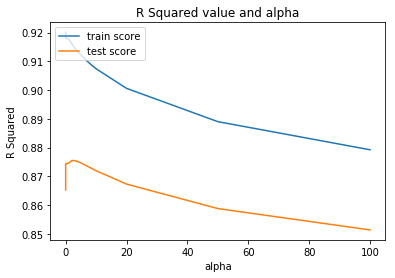

In [83]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R Squared')
plt.title("R Squared value and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

### Optimal value of alpha for a better R squared of the Test data (alpha = 7)

In [84]:
alpha = 7
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 1.88764069e-04,  1.94640082e-04,  1.58902432e-04,  9.70974026e-03,
        1.37979439e-02,  1.45198536e-04,  1.18457866e-04,  6.33876192e-03,
        2.26654503e-02,  4.53347702e-03,  2.60070996e-02,  1.04144992e-04,
        6.31856900e-05,  7.39720918e-03, -2.12376753e-02, -4.90539788e-02,
        7.07551182e-02, -1.02267092e-02, -6.87451862e-03,  1.02184108e-02,
        1.66904862e-02,  5.88464103e-04,  7.60713717e-03, -2.09641918e-03,
       -7.39221504e-05, -1.66304586e-02,  3.34065509e-04,  7.11905873e-03,
        1.05348244e-02, -3.34799637e-02, -2.88951730e-02, -1.02267092e-02,
       -1.04585839e-02, -8.37085763e-03,  1.18747061e-02,  1.45622017e-03,
        6.77108769e-03,  8.25581492e-03,  1.11204794e-02,  1.92520112e-02,
        1.90832496e-02,  1.43670410e-03,  6.29736942e-03,  2.45590688e-02,
       -1.66592736e-02,  1.57672610e-02,  3.52103083e-02,  6.82818604e-03,
        2.49422739e-02,  1.45197098e-04,  1.76104020e-04,  5.38693937e-03,
        4.08631420e-02,  

### Parameters of Ridge Regression Model

In [85]:
# Ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
model_params = list(zip(cols, model_parameters))

In [86]:
import operator
model_params.sort(key = operator.itemgetter(1))
print(model_params)

[('OverallQual_Fair', -0.145), ('OverallCond_Fair', -0.131), ('Neighborhood_MeadowV', -0.119), ('Neighborhood_IDOTRR', -0.114), ('OverallQual_Poor', -0.086), ('OverallCond_Below_Avg', -0.076), ('KitchenAbvGr', -0.061), ('Neighborhood_Edwards', -0.06), ('Neighborhood_BrDale', -0.057), ('OverallQual_Below_Avg', -0.051), ('Exterior1st_BrkComm', -0.049), ('SaleCondition_Abnorml', -0.049), ('Neighborhood_OldTown', -0.046), ('OverallCond_Poor', -0.039), ('SaleType_WD', -0.038), ('SaleCondition_Family', -0.035), ('Exterior2nd_Brk Cmn', -0.033), ('SaleType_COD', -0.031), ('Exterior2nd_BrkFace', -0.029), ('OverallQual_Average', -0.028), ('SaleType_ConLw', -0.026), ('Neighborhood_Mitchel', -0.025), ('Exterior1st_AsbShng', -0.021), ('HouseStyle_2Story', -0.021), ('Neighborhood_NWAmes', -0.019), ('Exterior1st_Wd Sdng', -0.017), ('Foundation_BrkTil', -0.017), ('GarageType_NG', -0.017), ('Neighborhood_Blmngtn', -0.017), ('Neighborhood_Sawyer', -0.016), ('HouseStyle_SFoyer', -0.014), ('HouseStyle_1St

## Top 5 features that contribute to increase in Sale Price

In [87]:
from heapq import nlargest
from operator import itemgetter

nlargest(6, model_params, key=itemgetter(1))

[('constant', 10.968),
 ('OverallQual_Excellent', 0.155),
 ('Neighborhood_Crawfor', 0.133),
 ('OverallCond_Excellent', 0.113),
 ('Neighborhood_StoneBr', 0.099),
 ('OverallQual_Very_Good', 0.091)]

## Top 5 features that contribute to decrease in Sale Price

In [88]:
from heapq import nsmallest
from operator import itemgetter

nsmallest(5, model_params, key=itemgetter(1))

[('OverallQual_Fair', -0.145),
 ('OverallCond_Fair', -0.131),
 ('Neighborhood_MeadowV', -0.119),
 ('Neighborhood_IDOTRR', -0.114),
 ('OverallQual_Poor', -0.086)]

### R Squared values of Train and Test Data - Ridge Regression - Alpha=7

In [89]:
# predict
y_train_pred = ridge.predict(X_train)
print("Ridge Regression - Train Data R Squared Value")
print(r2_score(y_true=y_train, y_pred=y_train_pred))
print("Ridge Regression - Test Data R Squared Value")
y_test_pred = ridge.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

Ridge Regression - Train Data R Squared Value
0.9082981701739408
Ridge Regression - Test Data R Squared Value
0.9341726788004259


### Plotting of Parameters

In [90]:
ridge_params = pd.DataFrame(model_params, columns =['Parameter', 'Coeff'])  
ridge_params = ridge_params[ridge_params.Parameter!='constant']

In [91]:
# We will find the feature with the highest coefficient and calculate the 
# relative imporatnce of all the features wrt to the maximum coefficient value
maxCoeff = ridge_params.Coeff.max()
ridge_params['rel_coeff'] = round(ridge_params.Coeff/maxCoeff * 100, 2)
ridge_params = ridge_params.sort_values(by = ['rel_coeff'],ascending=False)
ridge_params = ridge_params.reset_index(drop=True)

In [92]:
ridge_params_plot = ridge_params.loc[:4,['Parameter','rel_coeff']]

### Plotting of Top 5 features according to the relative Importance

<Figure size 576x432 with 0 Axes>

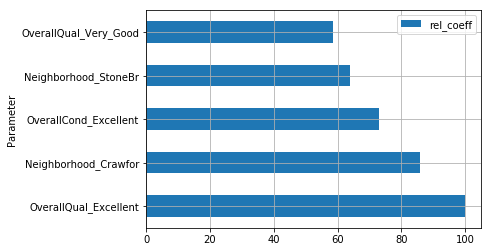

In [93]:
ridge_params_plot = ridge_params_plot.sort_values(by='rel_coeff',ascending=False)
plt.figure(figsize=(8,6))
ridge_params_plot.plot.barh(x='Parameter',y='rel_coeff')
plt.grid()
plt.show()

In [94]:
ridge_params_plot = ridge_params[['Parameter','rel_coeff']].tail(5)

### Plotting of top 5 features inversely affecting Sale Price

<Figure size 576x432 with 0 Axes>

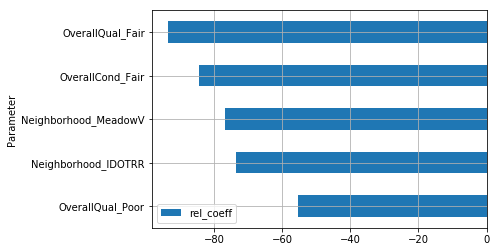

In [95]:
ridge_params_plot = ridge_params_plot.sort_values(by='rel_coeff',ascending=False)
plt.figure(figsize=(8,6))
ridge_params_plot.plot.barh(x='Parameter',y='rel_coeff')
plt.grid()
plt.show()

## Lasso

## Lasso Model 1 - Testing with alpha=0.001

In [96]:
# lasso regression
lm = Lasso(alpha=0.001)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print("LASSO REGRESSION - TRAIN DATA - R SQUARED")
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print("LASSO REGRESSION - TEST DATA - R SQUARED")
print(r2_score(y_true=y_test, y_pred=y_test_pred))

LASSO REGRESSION - TRAIN DATA - R SQUARED
0.8988693045597416
LASSO REGRESSION - TEST DATA - R SQUARED
0.9296404454416145


In [97]:
from sklearn.model_selection import KFold

### Tuning Alpha for Lasso Regression using Cross Validation

In [98]:
# grid search CV

# set up cross validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
params = {'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]}

# grid search
# lasso model
model = Lasso()
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    1.7s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

### Cross Validation Results - Lasso Regression

In [99]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.124007,0.052222,0.034402,0.055855,0.001,{'alpha': 0.001},0.899063,0.879062,0.874114,0.833483,0.827568,0.862690,0.027607,1,0.897396,0.901260,0.899780,0.902355,0.909856,0.902129,0.004206
1,0.029602,0.001357,0.004600,0.001625,0.01,{'alpha': 0.01},0.848480,0.850608,0.828009,0.824494,0.770723,0.824484,0.028844,2,0.838176,0.839496,0.844446,0.841561,0.854568,0.843650,0.005855
2,0.021401,0.001357,0.004000,0.001265,1,{'alpha': 1.0},0.796916,0.804168,0.784884,0.816723,0.724998,0.785548,0.031971,3,0.790937,0.789502,0.797275,0.790416,0.811185,0.795863,0.008138
3,0.016401,0.000800,0.003400,0.000490,5,{'alpha': 5.0},0.690606,0.703677,0.674291,0.720404,0.650313,0.687861,0.024117,4,0.696967,0.693810,0.699984,0.688940,0.712513,0.698443,0.007928
4,0.015601,0.001200,0.004400,0.001855,10,{'alpha': 10.0},0.668619,0.680073,0.650284,0.693681,0.654994,0.669530,0.015974,5,0.679130,0.673551,0.682255,0.667684,0.690437,0.678611,0.007726


### Plotting of Alpha and R Squared values for Train and Test Data

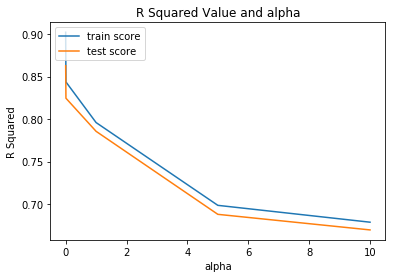

In [100]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R Squared')

plt.title("R Squared Value and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

### Optimall value of alpha with the maximum value of Test R-Squared is found to be 0.001

In [101]:
# lasso regression
lm = Lasso(alpha=0.001)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print("LASSO REGRESSION - TRAIN DATA - R SQUARED")
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print("LASSO REGRESSION - TEST DATA - R SQUARED")
print(r2_score(y_true=y_test, y_pred=y_test_pred))

LASSO REGRESSION - TRAIN DATA - R SQUARED
0.8988693045597416
LASSO REGRESSION - TEST DATA - R SQUARED
0.9296404454416145


### Model Parameters of Lasso Regression

In [102]:
# lasso model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
model_params = list(zip(cols, model_parameters))

In [103]:
import operator
model_params.sort(key = operator.itemgetter(1))
print(model_params)

[('OverallCond_Fair', -0.169), ('OverallQual_Fair', -0.139), ('Neighborhood_MeadowV', -0.107), ('Neighborhood_IDOTRR', -0.097), ('OverallCond_Below_Avg', -0.096), ('SaleCondition_Abnorml', -0.063), ('KitchenAbvGr', -0.045), ('Neighborhood_Edwards', -0.044), ('OverallQual_Below_Avg', -0.039), ('Neighborhood_OldTown', -0.036), ('OverallCond_Average', -0.028), ('OverallQual_Average', -0.019), ('SaleType_WD', -0.012), ('HouseStyle_2Story', -0.003), ('LotShape', -0.002), ('PropAgeYrs', -0.002), ('MoSold', -0.001), ('RemodAgeYrs', -0.001), ('1stFlrSF', 0.0), ('2ndFlrSF', 0.0), ('3SsnPorch', 0.0), ('BsmtFinSF1', 0.0), ('BsmtFinSF2', 0.0), ('BsmtHalfBath', -0.0), ('BsmtUnfSF', 0.0), ('EnclosedPorch', 0.0), ('Exterior1st_AsbShng', -0.0), ('Exterior1st_BrkComm', -0.0), ('Exterior1st_CBlock', -0.0), ('Exterior1st_CemntBd', -0.0), ('Exterior1st_HdBoard', -0.0), ('Exterior1st_Plywood', -0.0), ('Exterior1st_Stone', 0.0), ('Exterior1st_Stucco', -0.0), ('Exterior1st_VinylSd', 0.0), ('Exterior1st_Wd Sd

## Top 5 features that contribute to increase in Sale Price

In [104]:
from heapq import nlargest
from operator import itemgetter

nlargest(6, model_params, key=itemgetter(1))

[('constant', 10.98),
 ('OverallQual_Excellent', 0.14),
 ('Neighborhood_Crawfor', 0.132),
 ('OverallQual_Very_Good', 0.076),
 ('OverallCond_Excellent', 0.053),
 ('Neighborhood_StoneBr', 0.051)]

## Top 5 features that contribute to decrease in Sale Price

In [105]:
from heapq import nsmallest
from operator import itemgetter

nsmallest(5, model_params, key=itemgetter(1))

[('OverallCond_Fair', -0.169),
 ('OverallQual_Fair', -0.139),
 ('Neighborhood_MeadowV', -0.107),
 ('Neighborhood_IDOTRR', -0.097),
 ('OverallCond_Below_Avg', -0.096)]

### Plotting of Parameters

In [106]:
lasso_params = pd.DataFrame(model_params, columns =['Parameter', 'Coeff'])  
lasso_params = lasso_params[lasso_params.Parameter!='constant']

In [107]:
# We will find the feature with the highest coefficient and calculate the 
# relative imporatnce of all the features wrt to the maximum coefficient value
maxCoeff = lasso_params.Coeff.max()
lasso_params['rel_coeff'] = round(lasso_params.Coeff/maxCoeff * 100, 2)
lasso_params = lasso_params.sort_values(by = ['rel_coeff'],ascending=False)
lasso_params = lasso_params.reset_index(drop=True)

In [108]:
lasso_params_plot = lasso_params.loc[:4,['Parameter','rel_coeff']]

### Plotting of Top 5 features according to the relative Importance

<Figure size 576x432 with 0 Axes>

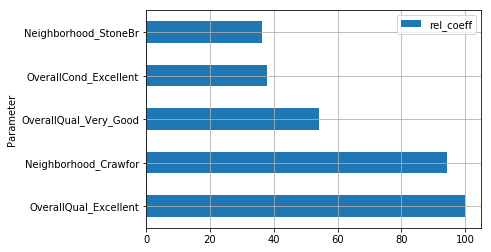

In [109]:
lasso_params_plot = lasso_params_plot.sort_values(by='rel_coeff',ascending=False)
plt.figure(figsize=(8,6))
lasso_params_plot.plot.barh(x='Parameter',y='rel_coeff')
plt.grid()
plt.show()

In [110]:
lasso_params_plot = lasso_params[['Parameter','rel_coeff']].tail(5)

### Plotting of top 5 features inversely affecting Sale Price

<Figure size 576x432 with 0 Axes>

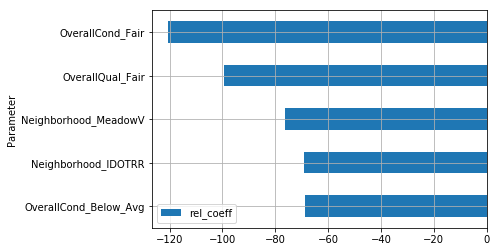

In [111]:
lasso_params_plot = lasso_params_plot.sort_values(by='rel_coeff',ascending=False)
plt.figure(figsize=(8,6))
lasso_params_plot.plot.barh(x='Parameter',y='rel_coeff')
plt.grid()
plt.show()

## SUMMARY:

<b> Recommendations to Surprise Housing Company based on Ridge Regression Model: </b>

1) The sale price of the prospective properties will increase if:
- The overall quality of the material and finish of the house is excellent
- The location of the house is within city limit of Crawford
- The overall condition of the house is Excellent
- The Location of the house is within city limit of Stone Brook
- The overall quality of material and finish of the house is Very Good

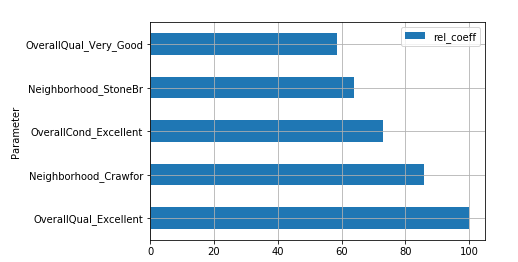

2) The sale price of the prospective properties tends to depreciate if:
- The Overall quality of material and finish of the house is Fair
- The Overall condition of the house is Fair
- The house Location is within limit of Meadow Village
- The house Location is within Iowa DOT and Rail Road
- Overall material and finish of the house is Poor

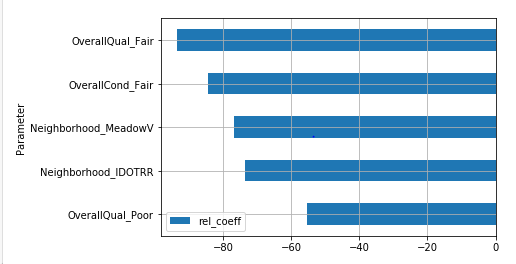

<br>
<b> Recommendations to Surprise Housing Company based on Lasso Regression Model: </b>

1) The sale price of the prospective properties will increase if:
- The overall quality of the material and finish of the house is excellent
- The location of the house is within city limit of Crawford
- The overall quality of the material and finish of the house is Very Good
- The overall condition of the house is Excellent
- The Location of the house is within city limit of Stone Brook

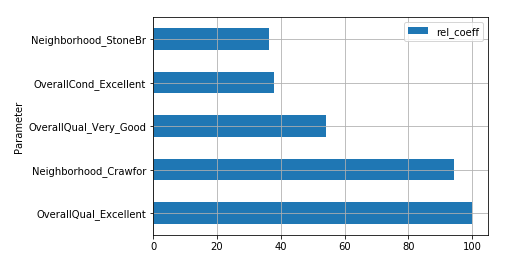


2) The sale price of the prospective properties tends to depreciate if:
- The Overall condition of the house is Fair
- The Overall quality of material and finish of the house is Fair
- The house Location is within limit of Meadow Village
- The house Location is within Iowa DOT and Rail Road
- Overall condition of the house is Below Average

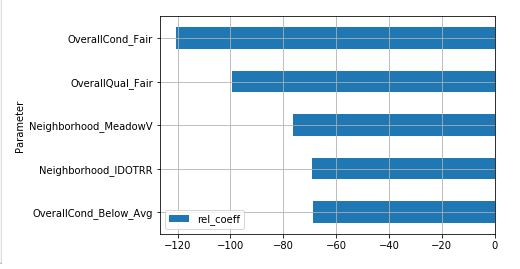

<b> OVERALL SUMMARY: </b>

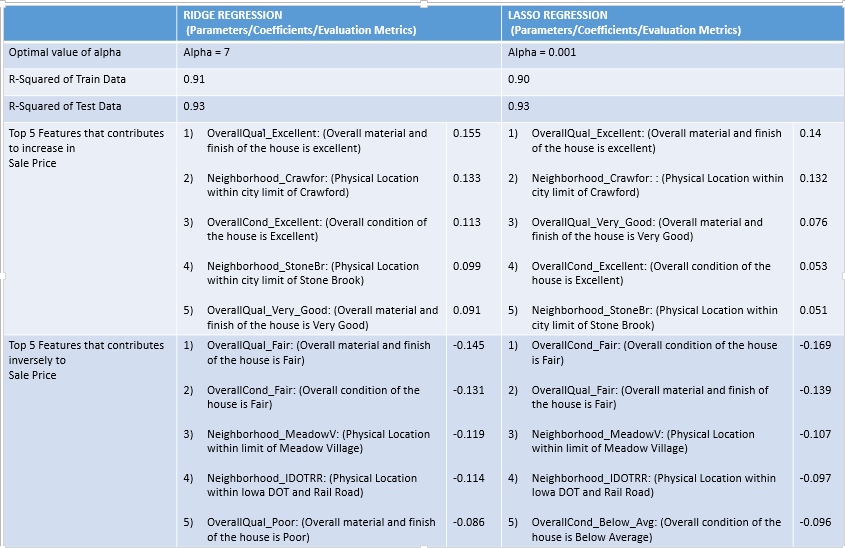